# Oxygenation - Body Event - Body Health

## Library

In [11]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [12]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/oxygenation.json') as file:
    data = json.load(file)

## Event

Event date: June 22, 2024 at 07:17

Saturation Average: 96%
vo2max: No values were obtained or it is null


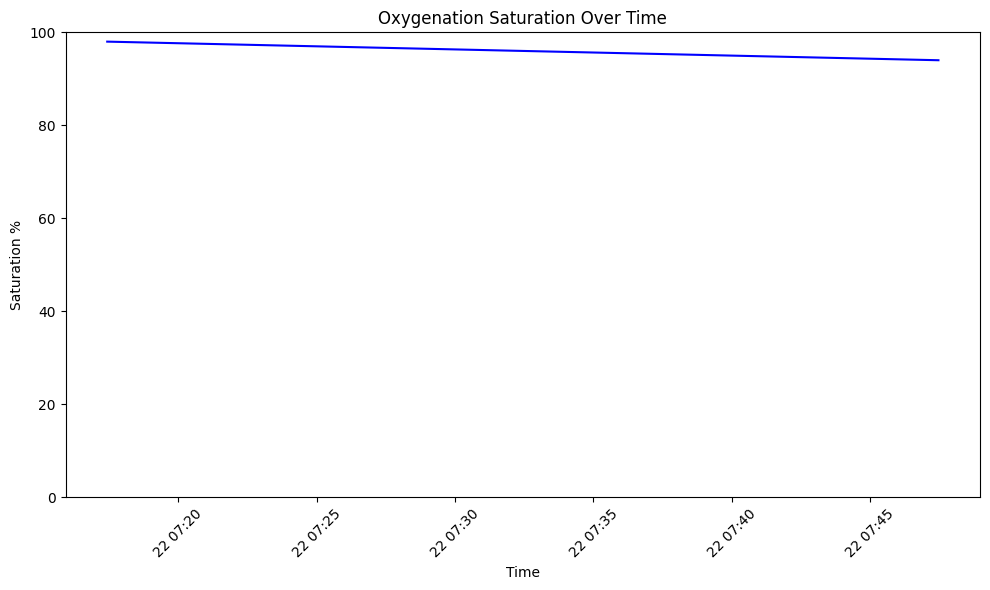

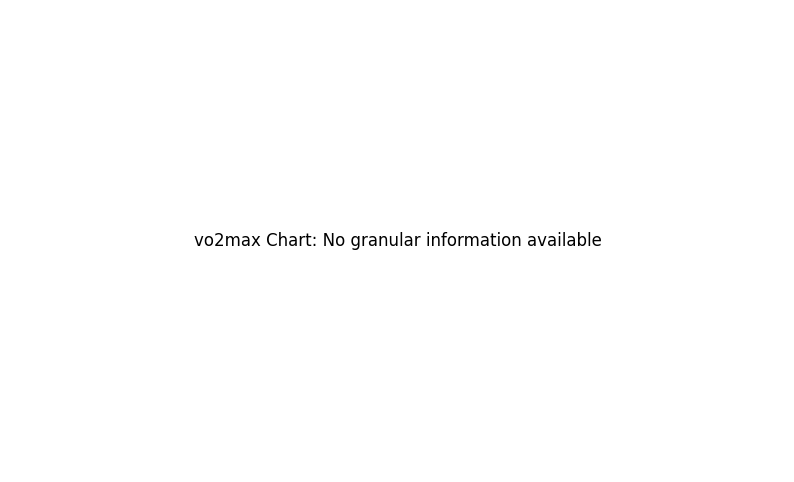

In [14]:
saturation_avg = data['body_health']['events']['oxygenation_event']['oxygenation']['saturation_avg_percentage_int']
saturation_granular = data['body_health']['events']['oxygenation_event']['oxygenation']['saturation_granular_data_array']
vo2max_ml = data['body_health']['events']['oxygenation_event']['oxygenation']['vo2max_mL_per_min_per_kg_int']
vo2max_granular = data['body_health']['events']['oxygenation_event']['oxygenation']['vo2_granular_data_array']
original_date = data['body_health']['events']['oxygenation_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)
print(f"Event date: {translated_date}\n")

# Checking the average saturation value
if saturation_avg is not None and saturation_avg > 0:
    print(f"Saturation Average: {saturation_avg}%")
else:
    print("Saturation Average: No values were obtained or it is null")

# Checking the average saturation value
if vo2max_ml is not None and vo2max_ml > 0:
    print(f"vo2max: {vo2max_ml} mL/min/kg")
else:
    print("vo2max: No values were obtained or it is null")

# Creating a DataFrame for the granular data
if saturation_granular:
    df = pd.DataFrame(saturation_granular)
    df['datetime_string'] = pd.to_datetime(df['datetime_string'])
    
    # Plotting the bar chart for saturation
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime_string'], df['saturation_percentage_int'], color='blue', label='Saturation %')
    plt.ylim(0, 100)
    plt.title('Oxygenation Saturation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Saturation %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Saturation Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in vo2max_granular]
vo2max = [item['vo2_mL_per_min_per_kg_int'] for item in vo2max_granular]

if vo2max_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, vo2max, linestyle='-')
    plt.title('Vo2max over time')
    plt.xlabel('Time')
    plt.ylabel('vo2max')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'vo2max Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    